In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
import prepare as p
import explore as e

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from math import sqrt

## Load your zillow dataset.

In [3]:
df = w.clean_zillow()

df.head()

found data


,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county
3,0,0.0,1535,2108,1953,174.21,Los Angeles
4,4,2.0,3633,296425,2005,6941.39,Los Angeles
6,3,4.0,1620,847770,2011,10244.94,Los Angeles
7,3,2.0,2077,646760,1926,7924.68,Los Angeles
8,0,0.0,1535,6730242,1953,80348.13,Los Angeles


## Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [4]:
train, val, test = p.split_data(df)

train.shape, val.shape, test.shape

((1503871, 7), (322258, 7), (322259, 7))

In [5]:
X_train = train[['square_ft']]
y_train = train.tax_value

X_val = val[['square_ft']]
y_val = val.tax_value

In [6]:
y_train.median()

327886.0

In [7]:
preds = pd.DataFrame({'y_actual': y_train,
             'y_baseline': y_train.median()})

preds.head()

,y_actual,y_baseline
1911171,288951,327886.0
818602,266330,327886.0
1795717,325747,327886.0
1973528,40740,327886.0
1139959,369055,327886.0


In [8]:
preds['y_baseline_resids'] = preds.y_baseline - preds.y_actual

preds.head()

,y_actual,y_baseline,y_baseline_resids
1911171,288951,327886.0,38935.0
818602,266330,327886.0,61556.0
1795717,325747,327886.0,2139.0
1973528,40740,327886.0,287146.0
1139959,369055,327886.0,-41169.0


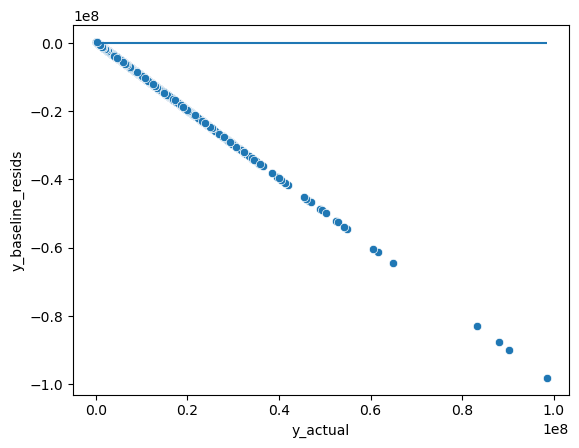

In [16]:
sns.scatterplot(data = preds, x = 'y_actual', y = 'y_baseline_resids')

plt.hlines(0, 0, preds.y_actual.max())

In [17]:
preds['y_baseline_resides_sq'] = preds['y_baseline_resids'] ** 2

preds.head()

,y_actual,y_baseline,y_baseline_resids,y_baseline_resides_sq
1911171,288951,327886.0,38935.0,1.515934e+09
818602,266330,327886.0,61556.0,3.789141e+09
1795717,325747,327886.0,2139.0,4.575321e+06
1973528,40740,327886.0,287146.0,8.245283e+10
1139959,369055,327886.0,-41169.0,1.694887e+09


In [18]:
sse_baseline = preds.y_baseline_resides_sq.sum()

sse_baseline

7.633754896847814e+17

In [19]:
mse_baseline = sse_baseline / len(preds)

mse_baseline

507607028584.75323

In [20]:
rmse_baseline = sqrt(mse_baseline)

rmse_baseline

712465.4578186603

## Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.



In [21]:
lm = LinearRegression()

lm.fit(X_train, y_train)

preds['y_hat'] = lm.predict(X_train)

In [22]:
rmse_model = sqrt(mean_squared_error(preds['y_actual'], preds['y_hat']))

rmse_model

629763.354145059

In [23]:
print(f'RMSE of our baseline: {round(rmse_baseline)}')
print(f'RMSE of our finely tuned model: {round(rmse_model)}')

RMSE of our baseline: 712465
RMSE of our finely tuned model: 629763


## Plot the residuals for the linear regression model that you made.

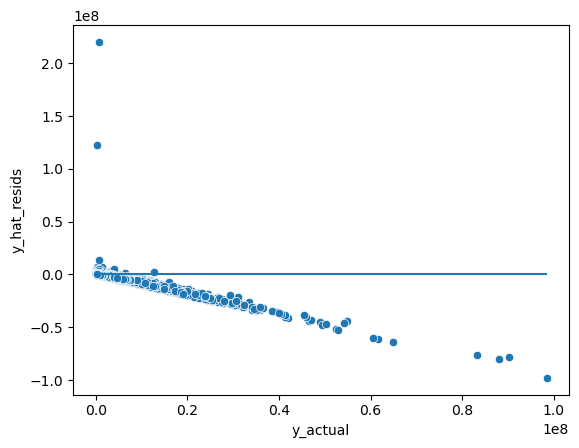

In [25]:
preds['y_hat_resids'] = preds.y_hat - preds.y_actual

sns.scatterplot(data = preds, x = 'y_actual', y = 'y_hat_resids')

plt.hlines(0, 0, preds.y_actual.max())

In [26]:
preds['y_baseline_minus_mean'] = preds.y_baseline - preds.y_actual.mean()

preds.head()

,y_actual,y_baseline,y_baseline_resids,y_baseline_resides_sq,y_hat,y_hat_resids,y_baseline_minus_mean
1911171,288951,327886.0,38935.0,1.515934e+09,303366.384569,14415.384569,-133975.431902
818602,266330,327886.0,61556.0,3.789141e+09,631445.260836,365115.260836,-133975.431902
1795717,325747,327886.0,2139.0,4.575321e+06,598962.203780,273215.203780,-133975.431902
1973528,40740,327886.0,287146.0,8.245283e+10,424017.739349,383277.739349,-133975.431902
1139959,369055,327886.0,-41169.0,1.694887e+09,632373.348181,263318.348181,-133975.431902


In [27]:
ess_baseline = sum(preds['y_baseline_minus_mean'] ** 2)

ess_baseline

2.6993606720305468e+16

In [28]:
tss_baseline = sse_baseline + ess_baseline

tss_baseline

7.903690964050868e+17

In [29]:
r_baseline = ess_baseline / tss_baseline

r_baseline

0.03415316570837996

In [30]:
r2_score(preds.y_actual, preds.y_hat)

0.19004244533912207